In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Data preparation
transform = transforms.Compose([
    transforms.ToTensor()
])


In [ ]:
# # data augemntation
# transform = transforms.Compose([
#     transforms.RandomRotation(10),  # Rotate the image slightly
#     transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),  # Add affine transformations
#     transforms.RandomPerspective(distortion_scale=0.2, p=0.5),  # Distort perspective
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))  # Normalize for better optimization
# ])
# train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 19.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 636kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.56MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.24MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
# Load MNIST dataset
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Split training data into train and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Data loaders

batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.24MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 154kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.19MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN architecture
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Flattened input to 128 units
        self.fc2 = nn.Linear(128, 10)  # Output for 10 classes (digits 0-9)

    def forward(self, x):
        # Convolution -> ReLU -> Pooling
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        # Convolution -> ReLU -> Pooling
        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        # Flatten the output
        x = x.view(-1, 64 * 7 * 7)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)

        return x

# Instantiate the model
model1 = CNN_1()

# Print the model architecture
print(model1)


CNN_1(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


Epoch 1/20, Training Loss: 1.6893, Validation Loss: 1.5281, Validation Accuracy: 0.9372
Epoch 2/20, Training Loss: 1.4946, Validation Loss: 1.4876, Validation Accuracy: 0.9757
Epoch 3/20, Training Loss: 1.4840, Validation Loss: 1.4842, Validation Accuracy: 0.9784
Epoch 4/20, Training Loss: 1.4767, Validation Loss: 1.4786, Validation Accuracy: 0.9834
Epoch 5/20, Training Loss: 1.4745, Validation Loss: 1.4770, Validation Accuracy: 0.9849
Epoch 6/20, Training Loss: 1.4732, Validation Loss: 1.4757, Validation Accuracy: 0.9863
Epoch 7/20, Training Loss: 1.4707, Validation Loss: 1.4745, Validation Accuracy: 0.9875
Epoch 8/20, Training Loss: 1.4698, Validation Loss: 1.4743, Validation Accuracy: 0.9878
Epoch 9/20, Training Loss: 1.4689, Validation Loss: 1.4742, Validation Accuracy: 0.9880
Epoch 10/20, Training Loss: 1.4676, Validation Loss: 1.4740, Validation Accuracy: 0.9879
Epoch 11/20, Training Loss: 1.4672, Validation Loss: 1.4735, Validation Accuracy: 0.9882
Epoch 12/20, Training Loss: 1.

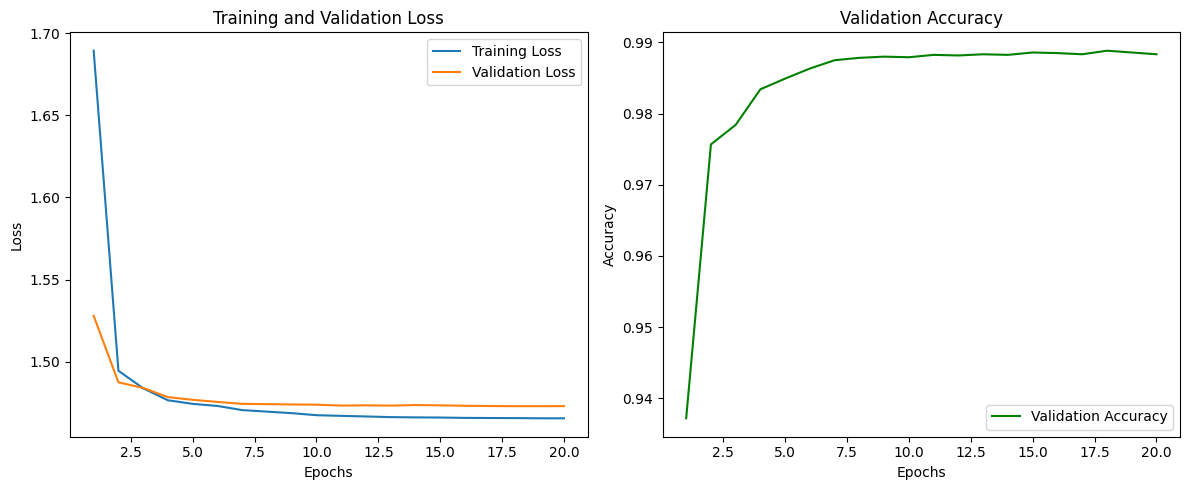

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

# Hyperparameters
num_epochs = 20
patience = 5
best_val_loss = float('inf')
trigger_times = 0

# Track metrics for visualization
train_losses = []
val_losses = []
val_accuracies = []

# Training function
def train_model():
    global trigger_times, best_val_loss  # Access global variables for early stopping
    model1.train()
    for epoch in range(num_epochs):
        train_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model1(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Calculate and store average training loss
        train_losses.append(train_loss / len(train_loader))

        # Validate the model
        val_loss, val_accuracy = validate_model()
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Scheduler step
        scheduler.step()

        print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_losses[-1]:.4f}, "
              f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0
            torch.save(model1.state_dict(), 'best_model.pth')  # Save the best model
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print("Early stopping!")
                break

# Validation function
def validate_model():
    model1.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model1(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = correct / len(val_dataset)
    return val_loss, val_accuracy

# Testing function
def test_model():
    model1.eval()
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model1(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
    accuracy = correct / len(test_dataset)
    print(f"Test Accuracy: {accuracy:.4f}")

# Plot metrics
def plot_metrics():
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color='green')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train, validate, and test the model
train_model()
test_model()
plot_metrics()


In [ ]:
torch.save(model1.state_dict(), 'model_2.pth')